# **Planet Imagery**

Planet achieved [**Mission one**](https://www.planet.com/pulse/mission-1), **imaging the entire earth every single day**. Having such an ambitious mission and achieveing it meant meant that can now analyze time series datasets over weekly and bi weekly periods and understand questions that require dynamic analysis such as vegetation patters, climate variability and changes in hydrological cycles. It generated the single largest trove of high frequency dataset in existence with an unprecedented cadence or repeat over areas.

To think of Planet products you have to understand two terms as thought they live in a hierarchy
Items and Assets
![planet-products](https://user-images.githubusercontent.com/6677629/66722158-0e8a6c80-edbf-11e9-95c2-3160e1598f7c.JPG)
* **Item type** almost refers exclusively to a family of satellite or sensor types so PlanetScope, RapidEye, Skysat, Landsat and so on are all item types. These are model definitions based on the type of sensor you are utilizing for performing any type of analysis.

* **Asset type** are types of item derivatives or data types that you are actually utilizing for example analytic, analytic_sr, analytic_xml, visual and so on. These allow you to choose the type of actual data that you are able to download including the type and level of preprocesing that has been applied to it.

To read more about Planet items and assets, [try this page](https://developers.planet.com/docs/api/items-assets/)



**Initialize the Planet Client**

Before we get anything started you should initialize the planet client. In this this required your email address and password associated with your Planet explorer account. If you are using Google colab you can remove the '#' symbol before ```!planet init```. Else open a new terminal in mybinder and use the method below. Then go back to the notebook

![initialize](https://user-images.githubusercontent.com/6677629/66725367-22959480-ede6-11e9-90e6-a4f53c33a95a.gif)


In [1]:
# Test planet installation
try:
    import planet
except ImportError:
    !pip install planet==1.3.2

#If using Colab
#!planet init

**Upload your AOI**

Visit [geojson.io](http://geojson.io) and draw your AOI. You will use this geometry to search for images that intersect your area and download them eventually. While search does not depend on your quota, download does. A useful rule of thumb, do not draw an extremely large AOI response might take a long time and fail. Avoid choosing a whole country or continent scale AOI :)

**Check your Quota**

Before you start work on this notebook check your quota in Sqkm to see if you can download your imagery. We are going to download only one image and then going to call this function again



In [1]:
import requests
import sys
from planet.api.auth import find_api_key


# Function to get user's quota
def planet_quota():
    # Get API Key: Requires user to have initialized Planet CLI
    try:
        api_key = find_api_key()
    except Exception as e:
        print(e)
        print('Failed to get Planet Key: Try planet init')
        sys.exit()
    '''Print allocation and remaining quota in Sqkm.'''
    try:
        main = requests.get('https://api.planet.com/auth/v1/experimental/public/my/subscriptions', auth=(api_key, ''))
        if main.status_code == 200:
            content = main.json()
            for item_id in content:
                print(" ")
                print(
                    'Subscription ID: %s'
                    % item_id['id'])
                print(
                    'Plan ID: %s'
                    % item_id['plan_id'])
                print(
                    'Allocation Name: %s'
                    % item_id['organization']['name'])
                print(
                    'Allocation active from: %s'
                    % item_id['active_from'].split("T")[0])
                print(
                    'Quota Enabled: %s'
                    % item_id['quota_enabled'])
                print(
                    'Total Quota in SqKm: %s'
                    % item_id['quota_sqkm'])
                print(
                    'Total Quota used: %s'
                    % item_id['quota_used'])
                if (item_id['quota_sqkm'])is not None:
                    leftquota = (float(
                        item_id['quota_sqkm'] - float(item_id['quota_used'])))
                    print(
                        'Remaining Quota in SqKm: %s' % leftquota)
                else:
                    print('No Quota Allocated')
                print('')
        elif main.status_code == 500:
            print('Temporary issue: Try again')
        else:
            print('Failed with exception code: ' + str(
                main.status_code))

    except IOError:
        print('Initialize client or provide API Key')


In [2]:
planet_quota()

 
Subscription ID: 41887
Plan ID: 1243
Allocation Name: joseph.mcglinchy@colorado.edu
Allocation active from: 2017-11-29
Quota Enabled: True
Total Quota in SqKm: 10000
Total Quota used: 567.429032052568
Remaining Quota in SqKm: 9432.570967947431



**Planet Stats**

Stats is an extremely useful too and is often when I start planning for my datasets. In this case right click on the geojson file you just uploaded and choose *copy path*. We will use this geometry file.

The parameters that enter into the setup include


1.   **interval**- month, week, year and so on
2.   **item-type** -PSScene4Band, PSOrthoTile, REOrthoTile and so on
3. **asset-type**- This is not necessary but you can provide an asset type like analytic, analytic_sr and so on

To read more about Planet items and assets, [try this page](https://developers.planet.com/docs/api/items-assets/)



In [6]:
!planet data stats --interval month --item-type PSScene4Band --asset-type analytic --geom ./ordway.geojson

{
  "buckets": [
    {
      "count": 4,
      "start_time": "2016-02-01T00:00:00.000000Z"
    },
    {
      "count": 1,
      "start_time": "2016-03-01T00:00:00.000000Z"
    },
    {
      "count": 0,
      "start_time": "2016-04-01T00:00:00.000000Z"
    },
    {
      "count": 0,
      "start_time": "2016-05-01T00:00:00.000000Z"
    },
    {
      "count": 0,
      "start_time": "2016-06-01T00:00:00.000000Z"
    },
    {
      "count": 0,
      "start_time": "2016-07-01T00:00:00.000000Z"
    },
    {
      "count": 5,
      "start_time": "2016-08-01T00:00:00.000000Z"
    },
    {
      "count": 6,
      "start_time": "2016-09-01T00:00:00.000000Z"
    },
    {
      "count": 8,
      "start_time": "2016-10-01T00:00:00.000000Z"
    },
    {
      "count": 4,
      "start_time": "2016-11-01T00:00:00.000000Z"
    },
    {
      "count": 14,
      "start_time": "2016-12-01T00:00:00.000000Z"
    },
    {
      "count": 3,
      "start_time": "2017-01-01T00:00:00.000000Z"
    },
    {
    

**Generate Planet Data Footprints**

The next thing I like to do, I want to see where these images are, what are the footprints of these images. This is also something that does not use your quota, but requires you to have an active planet account and a quota subscription. We are writing the metadata along with the geometry as a geojson file and upload it back to [geojson.io](http://geojson.io)

We use the flag **--limit** to specify the number of images we want to look for. Here I am specifying *100* images

In [30]:
# !planet data search --item-type PSScene4Band --asset-type analytic --limit 100 --geom /aoi.geojson >/fp.geojson
!planet data search --item-type PSScene4Band --asset-type analytic --date acquired gt 2017-09-01  --date acquired lt 2017-09-30 --range cloud_cover lt 0.1 --limit 2 --geom ./ordway.geojson > ./fp.geojson

![Footprint_metadata](https://user-images.githubusercontent.com/6677629/66720585-8d79a800-edb3-11e9-81da-9c7c1444b957.PNG)

**Downloading Planet Data**

This gets more interesting and will use your quota. Now before you get into the weeds about the planet command line tool that we have been exploring throughout the tutorial. Here is a medium article **[Demystifying Planet’s Command Line Tool](https://medium.com/planet-stories/demystifying-planets-command-line-tool-660870b32317)**

This should help you get to more advanced things. For this case we are going to download one image, we are going to set a start and end date and also use a cloud cover. We definitely want a clean imagery without clouds. So the things we are going to introduce are (here gt and lt specifies greater than and less than). Here cloud cover can be replaced with any other numeric metadata
1. Start Date --date acquired gt "2018–01–01"  
2. End date --date acquired lt "2018–12–31"
3. Cloud cover --range cloud_cover lt "0.2"


You can copy and paste this in your terminal window. The client has issues with piping the response so we use subprocess to download the imagery. Planet imagery is not active and needs time to be activated and then the download process can begin. So this can take some time even if we are downloading only a single image

In [25]:
import subprocess
try:
    subprocess.call("planet data download --item-type PSScene4Band --asset-type analytic --date acquired gt 2017-09-01  --date acquired lt 2017-09-30 --range cloud_cover lt 0.1 --limit 1 --geom ./ordway.geojson --dest .",shell=True)
except Exception as e:
    print(e)

Check the quota again it should have reduced by some amount.

In [31]:
planet_quota()

 
Subscription ID: 41887
Plan ID: 1243
Allocation Name: joseph.mcglinchy@colorado.edu
Allocation active from: 2017-11-29
Quota Enabled: True
Total Quota in SqKm: 10000
Total Quota used: 567.429032052568
Remaining Quota in SqKm: 9432.570967947431



**Citing Planet Data**

From a concept in our garage, to operating the largest fleet of Earth-imaging satellites, many people have invested time and energy in developing and enabling access to Planet’s unique data feed. Please cite Planet when using our imagery and tools.

To cite Planet data in publications, please use the following:


*Planet Team (2017). Planet Application Program Interface: In Space for Life on Earth. San Francisco, CA. https://api.planet.com.*

# Read the NEON tile (acquired via Shiny app), and download a planet scene that intersects it

In [50]:
from matplotlib import pyplot as plt
import numpy as np
import geopandas as gpd

from shapely.geometry import mapping, box, Polygon
import geopandas as gpd
from fiona.crs import from_epsg
from rasterio.mask import mask as mask
import rasterio as rio

import subprocess


In [4]:
#!pip install shapely

In [5]:
with rio.open('./NEON_D03_OSBS_DP3_404000_3283000_NDVI.tif') as src:
    print(src.profile)
    n_arr = src.read()
    n_arr[n_arr==-9999] = np.nan

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 1000, 'height': 1000, 'count': 1, 'crs': CRS.from_epsg(32617), 'transform': Affine(1.0, 0.0, 404000.0,
       0.0, -1.0, 3284000.0), 'tiled': False, 'interleave': 'band'}


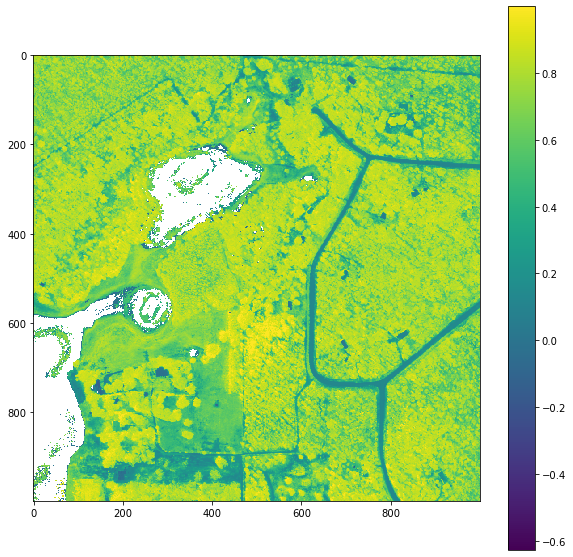

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(n_arr[0])
plt.colorbar()
plt.show()

In [7]:
neon_poly = box(404000.0, 3284000.0 - 1000, 404000.0 + 1000, 3284000.0)
neon_gdf = gpd.GeoDataFrame({'geometry':[neon_poly]})
neon_gdf.crs = from_epsg(32617)
neon_gdf.to_crs(epsg=4326).to_file('./neon_tile.geojson', driver='GeoJSON')

Note the parameters... 
- date filter... I downloaded a tile from the 2017 dataset collected in September, and specified this in the date filter.
- I am specifying `--asset-type analytic` to retrieve the L1 TOA reflectance product
- I am specifying `--range cloud_cover lt 0.1` for cloud cover less than 10% 

In [32]:
try:
    subprocess.call("planet data download --item-type PSScene4Band --asset-type analytic_xml --date acquired gt 2017-09-01  --date acquired lt 2017-09-30 --range cloud_cover lt 0.1 --limit 1 --geom ./neon_tile.geojson --dest .",shell=True)
except Exception as e:
    print(e)

In [38]:
planet_quota() # quota should be reduced if something downloaded. if not, adjust date or cloud cover filter!

 
Subscription ID: 41887
Plan ID: 1243
Allocation Name: joseph.mcglinchy@colorado.edu
Allocation active from: 2017-11-29
Quota Enabled: True
Total Quota in SqKm: 10000
Total Quota used: 567.429032052568
Remaining Quota in SqKm: 9432.570967947431



# Open the Planet scene, and then crop it by the NEON tile geometry

Load the full scene

In [55]:
with rio.open('./20170926_163011_1049_3B_AnalyticMS.tif') as src:
    pl_arr = src.read().astype('float') * 0.01 #coef from xml metadata to radiance
    print(src.profile)
    
    pl_arr[pl_arr==0] = np.nan
    print(pl_arr.shape)
    
# apply correction factors
band_1_coef = 1.95899551703e-05
band_2_coef = 2.06854460844e-05
band_3_coef = 2.30748465452e-05
band_4_coef = 3.44843628031e-05

pl_arr[0] *= band_1_coef
pl_arr[1] *= band_2_coef
pl_arr[2] *= band_3_coef
pl_arr[3] *= band_4_coef

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 8361, 'height': 4026, 'count': 4, 'crs': CRS.from_epsg(32617), 'transform': Affine(3.0, 0.0, 385104.0,
       0.0, -3.0, 3287010.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'pixel'}
(4, 4026, 8361)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


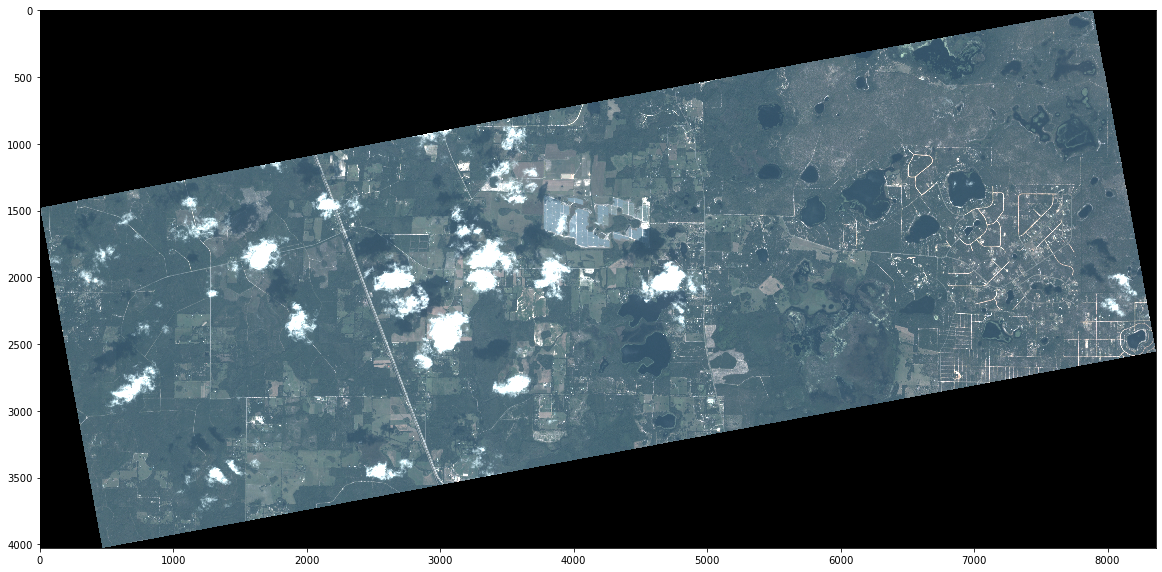

In [56]:
plt.figure(figsize=(20,10))
plt.imshow(np.rollaxis(pl_arr,0,3)[:,:,[2,1,0]]*500)
plt.show()

Now crop it with `rasterio.mask`

In [57]:
with rio.open('./20170926_163011_1049_3B_AnalyticMS.tif') as src:
    pl_arr,_ = mask(src, [neon_poly], crop=True)
    pl_arr = pl_arr.astype('float') *0.01
    pl_arr[pl_arr==0] = np.nan
    print(pl_arr.shape)
    
# apply correction factors
band_1_coef = 1.95899551703e-05
band_2_coef = 2.06854460844e-05
band_3_coef = 2.30748465452e-05
band_4_coef = 3.44843628031e-05

pl_arr[0] *= band_1_coef
pl_arr[1] *= band_2_coef
pl_arr[2] *= band_3_coef
pl_arr[3] *= band_4_coef

(4, 334, 334)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


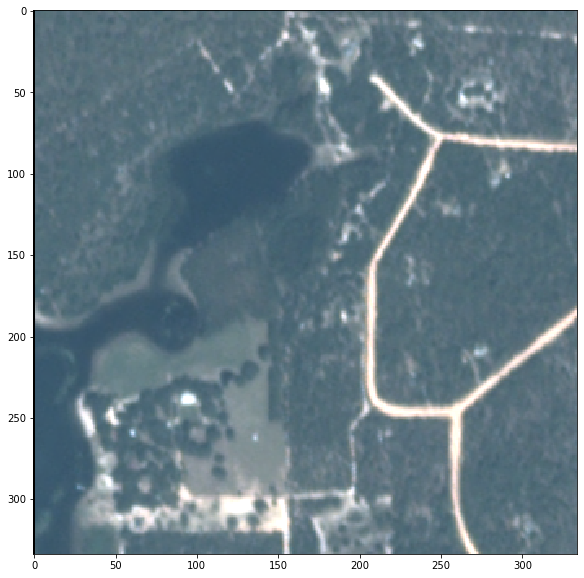

In [58]:
plt.figure(figsize=(10,10))
plt.imshow(np.rollaxis(pl_arr,0,3)[:,:,[2,1,0]]*500)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


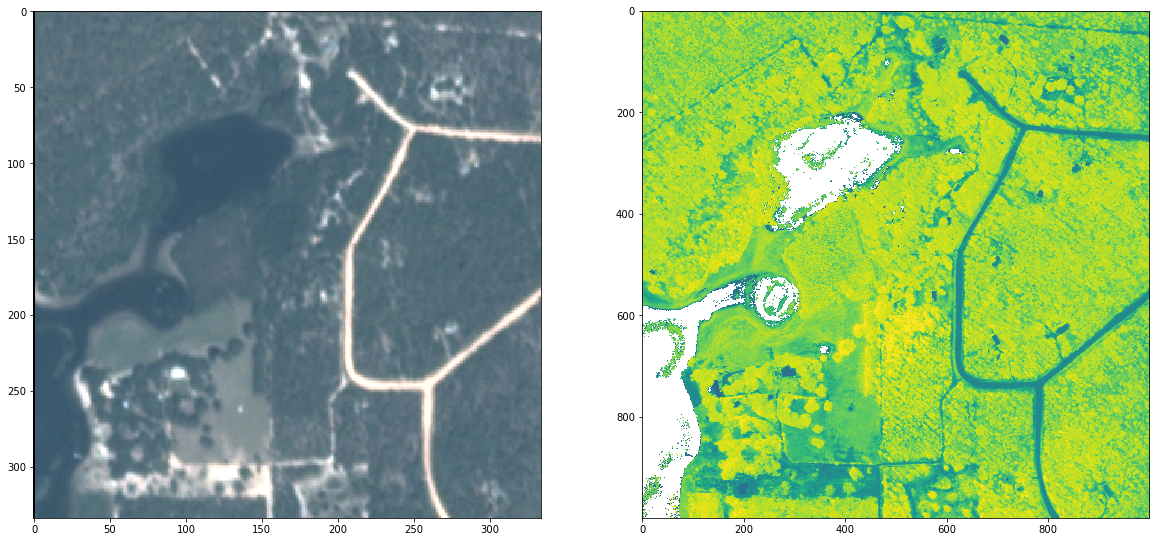

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].imshow(np.rollaxis(pl_arr,0,3)[:,:,[2,1,0]]*500)
ax[1].imshow(n_arr[0])
plt.show()

Generate a scatter plot of all ndvi values

In [60]:
pl_ndvi_toa = (pl_arr[3] - pl_arr[2]) / (pl_arr[3] + pl_arr[2])

In [61]:
# resize the NEON ndvi array
from skimage.transform import resize
# resize order keyword... the order of interpolation. The order has to be in the range 0-5:
# 0: Nearest-neighbor
# 1: Bi-linear (default)
# 2: Bi-quadratic
# 3: Bi-cubic
# 4: Bi-quartic
# 5: Bi-quintic
    


In [62]:
n_arr_resized = resize(n_arr[0], (pl_ndvi_toa.shape[0], pl_ndvi_toa.shape[1]), order=0, anti_aliasing=True)

print('NEON NDVI orig size: ', n_arr[0].shape)
print('resized to planet: ', n_arr_resized.shape)
print('Planet image size: ', pl_arr[0].shape)

NEON NDVI orig size:  (1000, 1000)
resized to planet:  (334, 334)
Planet image size:  (334, 334)


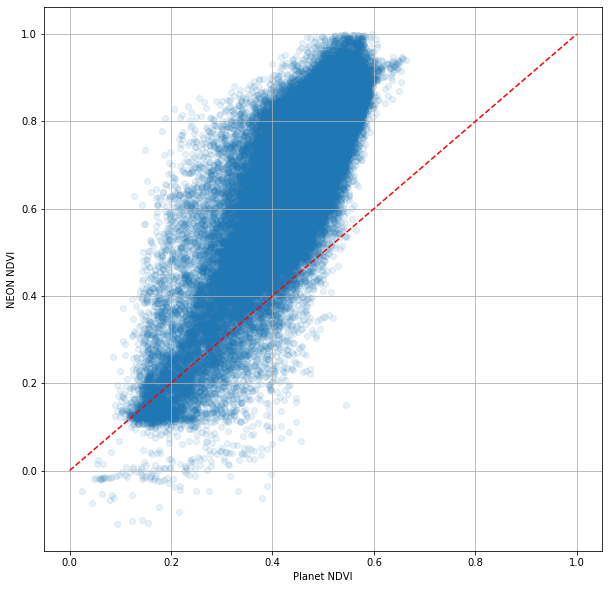

In [63]:
plt.figure(figsize=(10,10))
plt.scatter(pl_ndvi_toa.ravel(), n_arr_resized.ravel(), alpha=0.1)
plt.grid(True)
plt.plot([0,1], [0,1], '--r')
plt.xlabel('Planet NDVI')
plt.ylabel('NEON NDVI')
plt.show()

## The correlation is not great, but we were using TOA refelectance. Now try the same with the surface reflectance data!

In [64]:
with rio.open('./20170926_163011_1049_3B_AnalyticMS_SR.tif') as src:
    pl_arr = src.read().astype('float') / 10000
    print(src.profile)
    
    pl_arr[pl_arr==0] = np.nan
    print(pl_arr.shape)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 8361, 'height': 4026, 'count': 4, 'crs': CRS.from_epsg(32617), 'transform': Affine(3.0, 0.0, 385104.0,
       0.0, -3.0, 3287010.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'pixel'}
(4, 4026, 8361)


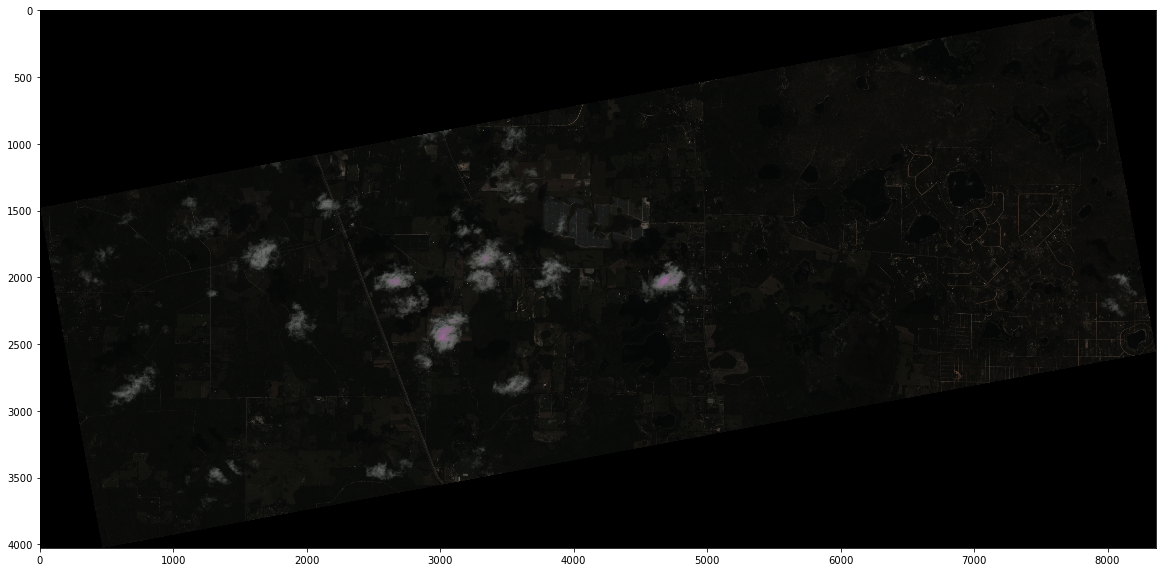

In [65]:
plt.figure(figsize=(20,10))
plt.imshow(np.rollaxis(pl_arr,0,3)[:,:,[2,1,0]])
plt.show()

Now crop it with `rasterio.mask`

In [66]:
with rio.open('./20170926_163011_1049_3B_AnalyticMS_SR.tif') as src:
    pl_arr,_ = mask(src, [neon_poly], crop=True)
    pl_arr = pl_arr.astype('float') / 10000
    pl_arr[pl_arr==0] = np.nan
    print(pl_arr.shape)

(4, 334, 334)


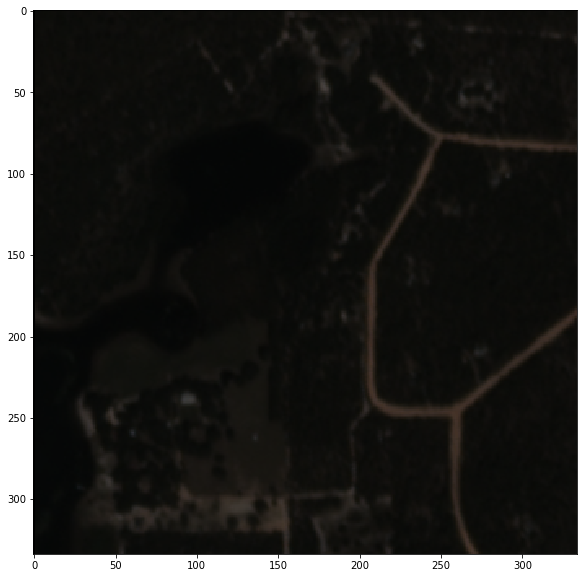

In [67]:
plt.figure(figsize=(10,10))
plt.imshow(np.rollaxis(pl_arr,0,3)[:,:,[2,1,0]])
plt.show()

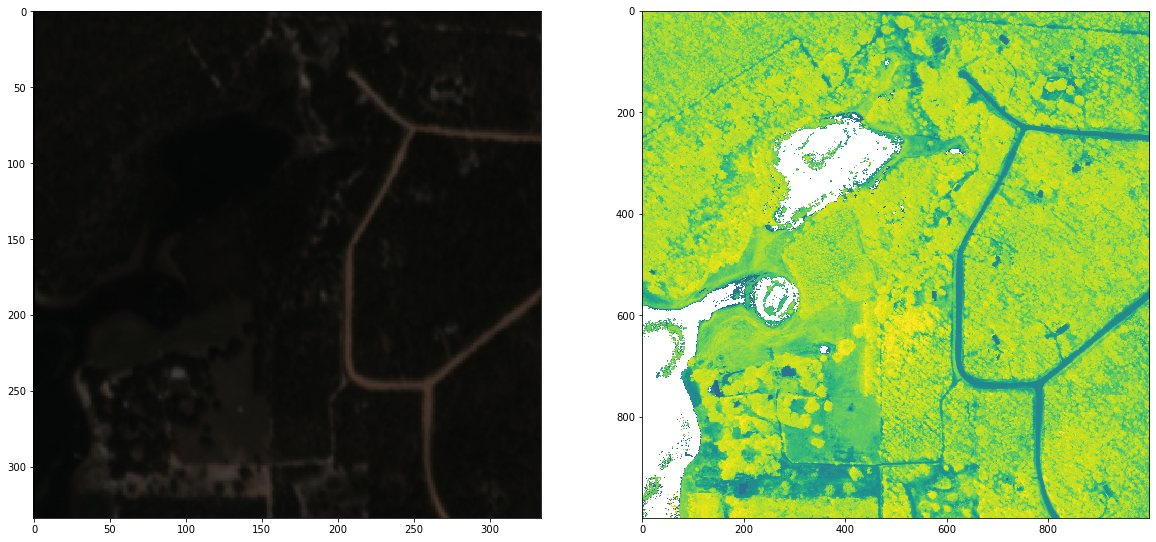

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].imshow(np.rollaxis(pl_arr,0,3)[:,:,[2,1,0]])
ax[1].imshow(n_arr[0])
plt.show()

Generate a scatter plot of all ndvi values

In [69]:
pl_ndvi_sr = (pl_arr[3] - pl_arr[2]) / (pl_arr[3] + pl_arr[2])

In [70]:
n_arr_resized = resize(n_arr[0], (pl_ndvi_sr.shape[0], pl_ndvi_sr.shape[1]), order=0, anti_aliasing=True)

print('NEON NDVI orig size: ', n_arr[0].shape)
print('resized to planet: ', n_arr_resized.shape)
print('Planet image size: ', pl_arr[0].shape)

NEON NDVI orig size:  (1000, 1000)
resized to planet:  (334, 334)
Planet image size:  (334, 334)


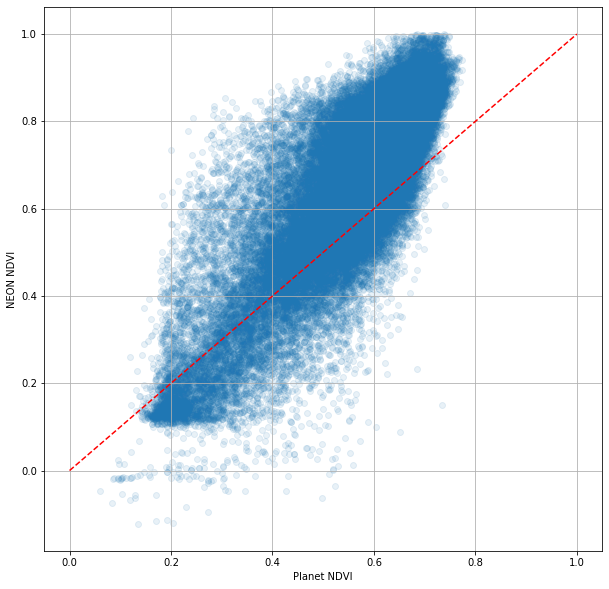

In [71]:
plt.figure(figsize=(10,10))
plt.scatter(pl_ndvi_sr.ravel(), n_arr_resized.ravel(), alpha=0.1)
plt.grid(True)
plt.plot([0,1], [0,1], '--r')
plt.xlabel('Planet NDVI')
plt.ylabel('NEON NDVI')
plt.show()

Plot them side by side

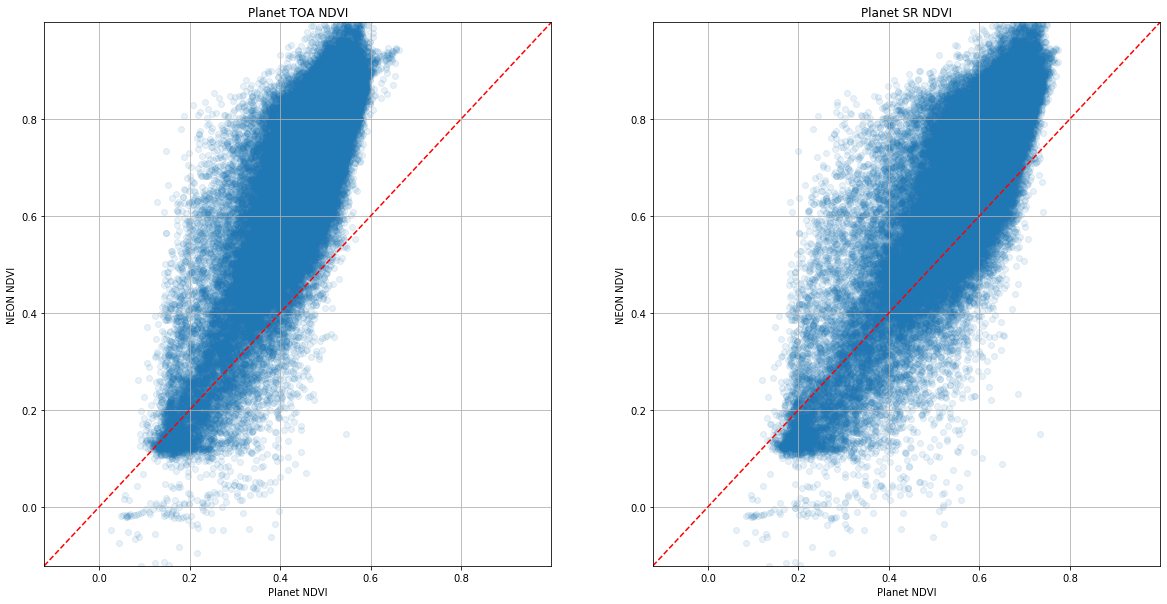

In [72]:
vmax = max(np.nanmax(pl_ndvi_toa), np.nanmax(pl_ndvi_sr), np.nanmax(n_arr_resized))
vmin = min(np.nanmin(pl_ndvi_toa), np.nanmin(pl_ndvi_sr), np.nanmin(n_arr_resized))

fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].scatter(pl_ndvi_toa.ravel(), n_arr_resized.ravel(), alpha=0.1)
ax[0].plot([vmin, vmax], [vmin, vmax], '--r')
ax[0].set_title('Planet TOA NDVI')
ax[0].grid(True)
ax[0].set_xlim(vmin, vmax)
ax[0].set_ylim(vmin, vmax)
ax[0].set_xlabel('Planet NDVI')
ax[0].set_ylabel('NEON NDVI')

ax[1].scatter(pl_ndvi_sr.ravel(), n_arr_resized.ravel(), alpha=0.1)
ax[1].plot([vmin, vmax], [vmin, vmax], '--r')
ax[1].set_title('Planet SR NDVI')
ax[1].grid(True)
ax[1].set_xlim(vmin, vmax)
ax[1].set_ylim(vmin, vmax)
ax[1].set_xlabel('Planet NDVI')
ax[1].set_ylabel('NEON NDVI')
plt.show()

## What to investigate next...?